In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow
from keras.models import Sequential # To initialise the nn as a sequence of layers
from keras.layers import Convolution2D # To make the convolution layer for 2D images
from keras.layers import MaxPooling2D # 
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import CSVLogger
from tensorflow.keras.optimizers import RMSprop
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow import data
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from tensorflow import repeat as rp

csv=CSVLogger("2_adam40.log")
#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32,(2,2),input_shape = (224,224,1), activation = 'relu',strides=2,name='convo1'))
classifier.add(Convolution2D(64,(3,3), activation = 'relu',name='convo2'))
# Step 1 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Step 2 - Convolution
classifier.add(Convolution2D(64,(3,3),activation = 'relu',name='convo3'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
# Step 3 - Convolution
classifier.add(Convolution2D(64,(3,3),activation = 'relu',name='convo4'))
# Step 3 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
#Step 4 - Flattening

classifier.add(Flatten())

classifier.add(BatchNormalization())
classifier.add(Dropout((0.5)))
classifier.add(Dense(1024, activation = 'relu'))

'''classifier.add(BatchNormalization())
classifier.add(Dropout((0.5)))
classifier.add(Dense(512, activation = 'relu'))
'''

classifier.add(BatchNormalization())
classifier.add(Dropout((0.4)))
classifier.add(Dense(20, activation = 'softmax'))

In [6]:
import matplotlib.pyplot as plt
adam = Adam(epsilon = 0.01)
classifier.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

curr_path = os.getcwd()
basefolder = os.path.dirname(curr_path)
train_folder = os.path.join(basefolder, "..\\Dataset\\Train")
test_folder = os.path.join(basefolder, "..\\Dataset\\dev")
train_set=tensorflow.data
train_set = train_datagen.flow_from_directory(train_folder,target_size=(224, 224),batch_size=32,class_mode='categorical',color_mode='grayscale')


test_set = test_datagen.flow_from_directory(test_folder,target_size=(224, 224),batch_size=32,class_mode='categorical',color_mode='grayscale')
classifier.metrics_names




Found 2585 images belonging to 20 classes.
Found 200 images belonging to 20 classes.


[]

In [7]:
#nb_conda_kernels

In [8]:
history = classifier.fit(train_set,steps_per_epoch=train_set.n/32,epochs=40,validation_data=test_set,validation_steps=test_set.n/32,callbacks=[csv],verbose=1)

Epoch 1/40
80/80 [==============================] - 44s 537ms/step - loss: 3.4772 - accuracy: 0.1350 - val_loss: 2.9795 - val_accuracy: 0.0650
Epoch 2/40
80/80 [==============================] - 40s 491ms/step - loss: 2.5192 - accuracy: 0.2867 - val_loss: 2.9666 - val_accuracy: 0.0900
Epoch 3/40
80/80 [==============================] - 91s 1s/step - loss: 1.9016 - accuracy: 0.4286 - val_loss: 2.9431 - val_accuracy: 0.0950
Epoch 4/40
80/80 [==============================] - 102s 1s/step - loss: 1.3745 - accuracy: 0.5675 - val_loss: 3.0329 - val_accuracy: 0.0600
Epoch 5/40
80/80 [==============================] - 104s 1s/step - loss: 1.0149 - accuracy: 0.6650 - val_loss: 2.7090 - val_accuracy: 0.1750
Epoch 6/40
80/80 [==============================] - 106s 1s/step - loss: 0.7411 - accuracy: 0.7567 - val_loss: 2.5266 - val_accuracy: 0.2000
Epoch 7/40
80/80 [==============================] - 104s 1s/step - loss: 0.6470 - accuracy: 0.7822 - val_loss: 2.9990 - val_accuracy: 0.2250
Epoch 8/40

In [9]:
classifier.save('2_adam_40ep.h5')

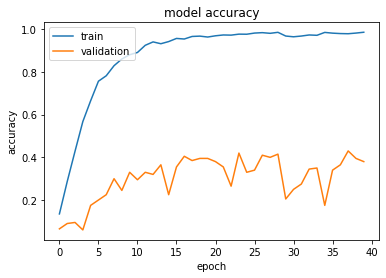

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy']) #validation
plt.plot(history.history['val_accuracy']) #train
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()